In [1]:
# Multilayer perceptrons are the most basic forms of deep neural networks.
# They consist of layers of fully conneceted neurons, from which they receive inputs and produce outputs.
# Automatic differntiation greatly simplifies the calculation of gradients. 
# Numerical stabililty and parameter initialization are key to training a deep neural network. 

In [2]:
import torch

In [ ]:
# Hidden layers: Linear trasformations with added bias. Linearity in affine transormations is a strong assumption
# Limitations of linear models: Linearity implies the weaker assumption of monticiity (that all changes in our features tie directly to changes in our output).
# We use deep neural networks because the data is not always linear. 
# With deep neural networks, we use observations ot jointly learn  both a representation and a linear predictor that acts upon that representation. 
# Non linearity has been in existence for decades. 
# We overcome the problem of non linearity with the use of stacked hidden layers, where each layer is a single or set of linear transformations. 
# L1 would be our representation and the final layer would be our predictions. 
# The architecture is referred to as teh multilayer perceptron. (MLP)
# Moving from linear to non linear: We gain nothing directly from the robustness of stacking nearal network layers above each other. This is becuase we are simply stacking affine functions
# above each other, and the affine function of an affine function is another affine function. Or linear model is already capable of representing affine functions, so why do we need to stack
# layers above each other?? 
# To add the so desired non-linearity we need to introduce the concept of activation. 
# The activation function is to be applied to the result of each affine function before being used in the next affine function. 
# A popular choice for activation is the ReLU function (rectified linear activation unit) was invented in 2010 by Nair and Hinton. 
# f(x) = max(0, x) <- is the definition of the ReLU activation function. The output of the activation functions are called activations. 
# With activations in place it is no longer possible to collapse our MLP into a single operatioin
#  H = ReLU(XW1 + b), O = HW2 + b).

# Universal Approximators: How powerful can deep neural networks be? It has been proven, that given even a single hidden layer
# and an undetermined number of nodes we can approximate/model any function. Actually learning that function is the hard part.
# Neural networks are like the C program in the sense that they could be used to express any computable program. But actually coming 
# up with the program is the hard part. 

# We can approximate a function more compactly be uisng deeper and not wider networks. So intead of trying to increase the number of features 
# in each layer we try to increase the number of layers. 

# Activation functions: Activation functions decide if a particular neuron should be active or not in a given layer.
# common activation functions:
# ReLU function: Relu is very popular due to its simplicity and its good performance on a bunch of predictive tasks. 
# the relu function is very simlpe, it converts a number to zero if it is less than zero, but keeps positive numbers the same. 


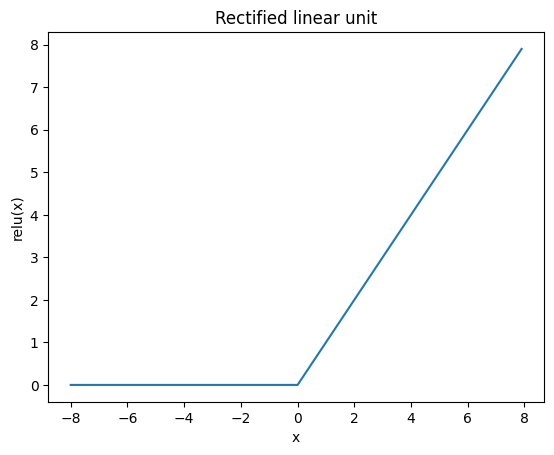

In [6]:
# Plotting the RelU activation function
import matplotlib.pyplot as plt
x =  torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
with torch.no_grad():
    plt.plot(x, y)
    plt.title("Rectified linear unit")
    plt.xlabel("x")
    plt.ylabel("relu(x)")
    plt.show()

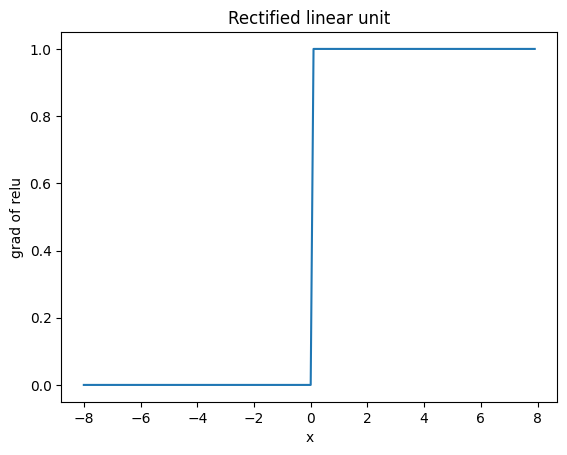

In [7]:
# We can see that the negative values have been flattend out to zero.
# If subtle boundary conditions matter, then we are doing real mathematics and not engineering. 

# We can show the derivative of the value of the gradiets as such
y.backward(torch.ones_like(x), retain_graph=True)
with torch.no_grad():
    plt.plot(x, x.grad)
    plt.title("Rectified linear unit")
    plt.xlabel("x")
    plt.ylabel("grad of relu")
    plt.show()

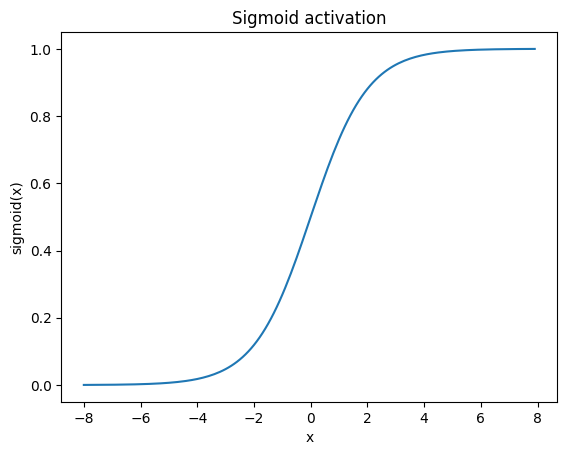

In [9]:
# The reason for using ReLU is that its derivatives are well behaved and mitigate the problem of vanishing gradients that plagued previous versions of neural networks. 
# There are other iterations of the ReLU function available and in use such as the parameterized ReLU, they are used in certain problem types

# Sigmoid function: This activation function transforms its inputs so that they fall in between 0 and 1. For this reason, the sigmoid function is also referred to as the squashing function. 
# it squashes values from range (-inf, inf)  to range (0, 1)
# the formula for the sigmoid function is 1/1+exp(-x)
# Earlier neural network scientists were interested in modeling biological neurons. 
# Sigmoid function became a natureal choice for gradient based learning because of its smooth nature
# Sigmoid can be seen as a special form of softmax function. However, recently sigmoid functions are being replaced with simpler functions such as ReLU
# This is becaus sigmoid poses some challenges for optimization. Sigmoid functions are still requently used in recurrent neural networks to control the flow of information. 

y = torch.sigmoid(x)
with torch.no_grad():
    plt.plot(x, y)
    plt.title("Sigmoid activation")
    plt.xlabel("x")
    plt.ylabel("sigmoid(x)")
    plt.show()

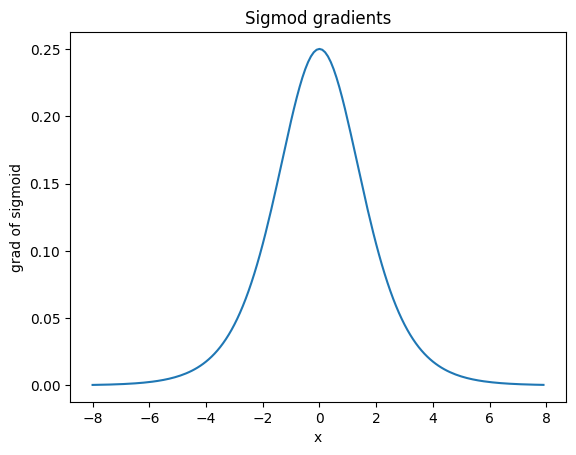

In [11]:
# The gradient of the sigmoid function can be defined as : exp(-x)/(1 + exp(-x))**2 or sigmoid(x)*(1-sigmoid(x))
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
with torch.no_grad():
    plt.plot(x, x.grad)
    plt.title("Sigmod gradients")
    plt.xlabel("x")
    plt.ylabel("grad of sigmoid")
    plt.show()

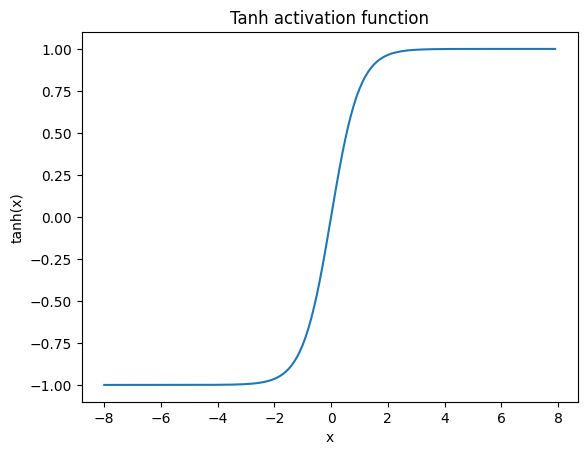

In [12]:
# Tanh activation function: Similar to the sigmoid function the tanh function is also a hyperbolic tangent that squahes its values to be between -1 and 1.
# tanh(x) = 1 - exp(-2*x)/1 + exp(-2*x)
y = torch.tanh(x)
with torch.no_grad():
    plt.plot(x, y)
    plt.title("Tanh activation function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    plt.show()

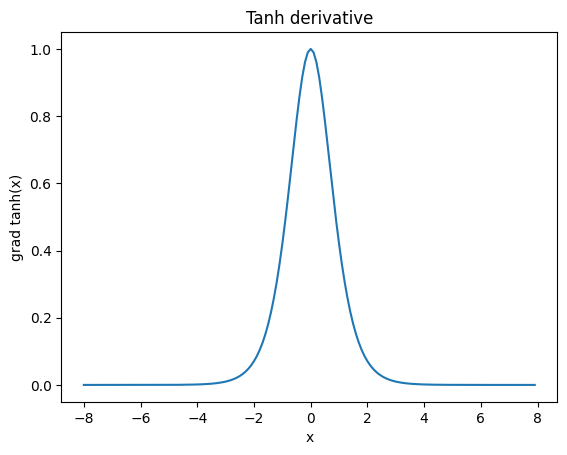

In [14]:
# The derivative of the tanh function can be calculated as 1 - tanh(x)**2

# To plot the derivative of the tanh activation function. 
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)

with torch.no_grad():
    plt.plot(x, x.grad)
    plt.title("Tanh derivative")
    plt.xlabel("x")
    plt.ylabel("grad tanh(x)")
    plt.show()

In [15]:
# It looks like a sharper version of the sigmoid function.
# ReLU was one of the innovations that lead to the resurgence of deep learning in the last decade.
# Research in activation functions has not stopped. GELU, Swish activation are newer activation functions that can yield better accuracy


# Linear deep neural networks do not increase in expressive power as you go deeper, 
# they maintian the same expressive power and can be compressed down into a single linear opertioin.
# non-linear actiavtion functions are what allow neural networks to build untop of each other, and they are needed for the general
# approximation theory of deep neural networks to hold true. Linear deep neural networks can actually even perform worse because they might produces a worse linear form than
# would have been produced by a single linear network

# The activation function of pRelu is sigma for x < 0 and 1 for x >= 0


In [17]:
1e-2

0.01

In [21]:
# Implementation of a multilayer perceptron

# Initialization of parameters: number of layers and their width is adjustable(They are considered hyperparameters)
# Typically we choose a layer width to be an even number. This is computationally efficient due to the way that memory is stored on the hardware.
from d2l import torch as d2l


# We define the relu activation function ourselves. 
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x, a)

class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hidden, lr, sigma=1e-2):
        super(MLPScratch, self).__init__()
        self.save_hyperparameters()
        self.W1 = torch.nn.Parameter(torch.randn(num_inputs, num_hidden) * sigma)
        self.b1 = torch.nn.Parameter(torch.ones(num_hidden))
        self.W2 = torch.nn.Parameter(torch.randn(num_hidden, num_outputs) * sigma)
        self.b2 = torch.nn.Parameter(torch.ones(num_outputs))
        
    def forward(self, X:torch.Tensor):
        X = X.reshape((-1, self.num_inputs)) # Flatten the image into a one dimensional vector
        H = torch.matmul(X, self.W1) + self.b1
        H = relu(H)
        O = torch.matmul(H, self.W2) + self.b2
        return O        

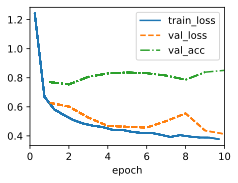

In [22]:
# Train the neural network  
mlp = MLPScratch(784, 10, 256, 1e-1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(mlp, data)

In [90]:
# Now we would like to make a concise implementation of the MLP
class MLPConcise(d2l.Classifier):
    def __init__(self, num_outputs, num_hidden, lr=1e-1):
        super(MLPConcise, self).__init__()
        self.save_hyperparameters()
        self.net = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=784, out_features=num_hidden), 
            torch.nn.PReLU(),
            torch.nn.Linear(in_features=num_hidden, out_features=num_hidden), 
            torch.nn.PReLU(),
            torch.nn.Linear(in_features=num_hidden, out_features=num_outputs)
        )

# No need to implement forward as the Module class which we inherit from is already
# calling self.net(X) in the forward function

# The sequential class abstracts the forward process enabliing us to focus on transfromations


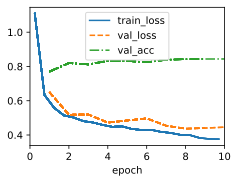

In [91]:
# The training loop remains the same
model = MLPConcise(10, 1028) # with the number of hidden outputs changed from 256 to 512 performance is still relatively same,the optimal value is 1024
trainer.fit(model, data)

In [ ]:
# We experimented increasing the number of layers to 2

In [36]:
# it is a bad idea to create a hidden layer with a single nueron becuse if you do so
# all the learned features will be compressed down into a single neuron predictor, and may not 
# be able to be reconstructed to get the latent information that was present before that layer.

In [ ]:
# Changing of the learning rate makes the convergence slower, but a learning rate too high can lead
# to overshooting and might end up not converging. A smaller learning rate would require a higher 
# number of epochs. 

# It is difficult to deal with multiple hyperpameters simultaneously because the search space is large
# and would require a large amount of compute to explore the set. 

In [80]:
# Testing matrix multiplication of various sizes
import time
X = torch.randn((1032, 1032))

In [87]:

start = time.time()
torch.matmul(X, X)
stop = time.time()
print("The operation took", stop - start, "seconds")

The operation took 0.0031957626342773438 seconds


In [92]:
# The memory bus width of the GPU is 1024
# matrix operation perform almost a 100 times better with GPUs than with CPUs

# I tried the PReLU activation function and it performed worse than the ReLU

In [ ]:
# Weight initialization matters because they can affect how quickly and how well
# our model performs. If we initialize our weights to zero this could adversely affect 
# the learning ability of our model.